# IT Academy - Data Science with Python
## Sprint 11: SkLearn Train Test
### [Github SkLearn Train Test](https://github.com/jesussantana/SkLearn-Train-Test)

[![forthebadge made-with-python](http://ForTheBadge.com/images/badges/made-with-python.svg)](https://www.python.org/)  
[![Made withJupyter](https://img.shields.io/badge/Made%20with-Jupyter-orange?style=for-the-badge&logo=Jupyter)](https://jupyter.org/try)  
[![wakatime](https://wakatime.com/badge/github/jesussantana/SkLearn-Train-Test.svg)](https://wakatime.com/badge/github/jesussantana/SkLearn-Train-Test)  

In [1]:
#%pip install sklearn

In [2]:
import pandas as pd
import numpy as np
import warnings


from sklearn.impute import SimpleImputer
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split

from matplotlib import pyplot as plt
import seaborn as sns
from PIL import Image
%matplotlib inline

plt.figure(figsize=(16, 6))
warnings.filterwarnings('ignore')
sns.set_theme(style='darkgrid', palette='deep')
pd.set_option('display.max_columns', None)

<Figure size 1152x432 with 0 Axes>

### Exercise 1: 
  - Split the DelayedFlights.csv dataset into train and test. Study the two sets separately, at a descriptive level.

### Exercise 2: 
  - Apply some transformation process (standardize numerical data, create dummy columns, polynomials.

### Exercise 3: 
  - Summarize the new columns generated statistically and graphically


Exercise 1, 2 & 3 developed below

In [3]:
path = '../data/'
file = 'raw/DelayedFlights.csv'

df_raw = pd.read_csv(path+file)

In [4]:
df_raw.head()

Unnamed: 0  Year  Month  DayofMonth  DayOfWeek  DepTime  CRSDepTime  \
0           0  2008      1           3          4   2003.0        1955   
1           1  2008      1           3          4    754.0         735   
2           2  2008      1           3          4    628.0         620   
3           4  2008      1           3          4   1829.0        1755   
4           5  2008      1           3          4   1940.0        1915   

   ArrTime  CRSArrTime UniqueCarrier  FlightNum TailNum  ActualElapsedTime  \
0   2211.0        2225            WN        335  N712SW              128.0   
1   1002.0        1000            WN       3231  N772SW              128.0   
2    804.0         750            WN        448  N428WN               96.0   
3   1959.0        1925            WN       3920  N464WN               90.0   
4   2121.0        2110            WN        378  N726SW              101.0   

   CRSElapsedTime  AirTime  ArrDelay  DepDelay Origin Dest  Distance  TaxiIn  \
0           150.0    116.0     -14.0       8.0    IAD  TPA       810     4.0   
1           145.0    113.0       2.0      19.0    IAD  TPA       810     5.0   
2            90.0     76.0      14.0       8.0    IND  BWI       515     3.0   
3            90.0     77.0      34.0      34.0    IND  BWI       515     3.0   
4           115.0     87.0      11.0      25.0    IND  JAX       688     4.0   

   TaxiOut  Cancelled CancellationCode  Diverted  CarrierDelay  WeatherDelay  \
0      8.0          0                N         0           NaN           NaN   
1     10.0          0                N         0           NaN           NaN   
2     17.0          0                N         0           NaN           NaN   
3     10.0          0                N         0           2.0           0.0   
4     10.0          0                N         0           NaN           NaN   

   NASDelay  SecurityDelay  LateAircraftDelay  
0       NaN            NaN                NaN  
1       NaN            NaN                NaN  
2       NaN            NaN                NaN  
3       0.0            0.0               32.0  
4       NaN            NaN                NaN

In [5]:
df = df_raw.drop(labels='Unnamed: 0', axis=1)

In [6]:
type(df)

pandas.core.frame.DataFrame

In [7]:
df = df_raw.loc[:,["ArrDelay","ArrTime", "Distance", "TaxiIn", "TaxiOut", "DayOfWeek", "DepDelay","CarrierDelay", 'UniqueCarrier']]

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1936758 entries, 0 to 1936757
Data columns (total 9 columns):
 #   Column         Dtype  
---  ------         -----  
 0   ArrDelay       float64
 1   ArrTime        float64
 2   Distance       int64  
 3   TaxiIn         float64
 4   TaxiOut        float64
 5   DayOfWeek      int64  
 6   DepDelay       float64
 7   CarrierDelay   float64
 8   UniqueCarrier  object 
dtypes: float64(6), int64(2), object(1)
memory usage: 133.0+ MB


- Data sampling to reduce loading time

In [9]:
df = df.sample(frac=0.001, random_state = 0)

In [10]:
import sys
new_path = '../scripts/'
if new_path not in sys.path:
    sys.path.append(new_path)

- Create Categorical Dummies

In [11]:
#Script created for transform categorical

import categorical

In [12]:
df = categorical.transform(df, "UniqueCarrier")

In [13]:
df

ArrDelay  ArrTime  Distance  TaxiIn  TaxiOut  DayOfWeek  DepDelay  \
595091        9.0   2104.0       737     3.0      9.0          4      22.0   
699277       -3.0   1147.0      1438    18.0     13.0          4       7.0   
513280       13.0   2118.0      1927     9.0     20.0          4      22.0   
555111       11.0   2201.0       989     6.0     14.0          1      16.0   
1269142      19.0   1329.0      1142     6.0      8.0          2      19.0   
...           ...      ...       ...     ...      ...        ...       ...   
127131       59.0   1744.0       177    11.0     19.0          3      56.0   
778462       11.0   1559.0       238     3.0      8.0          3      16.0   
766785       69.0   1917.0      1008     4.0     23.0          4      83.0   
1289392       8.0   2228.0       957     3.0      9.0          3      13.0   
484017       13.0   1403.0       781     3.0     22.0          2      15.0   

         CarrierDelay  UniqueCarrier_9E  UniqueCarrier_AA  UniqueCarrier_AS  \
595091            NaN                 0                 0                 0   
699277            NaN                 0                 1                 0   
513280            NaN                 0                 0                 0   
555111            NaN                 0                 0                 0   
1269142           0.0                 0                 0                 0   
...               ...               ...               ...               ...   
127131           18.0                 0                 0                 0   
778462            NaN                 0                 0                 0   
766785            0.0                 0                 0                 0   
1289392           NaN                 0                 0                 0   
484017            NaN                 0                 0                 0   

         UniqueCarrier_B6  UniqueCarrier_CO  UniqueCarrier_DL  \
595091                  0                 0                 0   
699277                  0                 0                 0   
513280                  0                 0                 0   
555111                  1                 0                 0   
1269142                 0                 0                 0   
...                   ...               ...               ...   
127131                  0                 0                 0   
778462                  0                 0                 0   
766785                  0                 0                 0   
1289392                 0                 0                 0   
484017                  0                 0                 0   

         UniqueCarrier_EV  UniqueCarrier_F9  UniqueCarrier_FL  \
595091                  0                 0                 0   
699277                  0                 0                 0   
513280                  0                 0                 0   
555111                  0                 0                 0   
1269142                 0                 0                 0   
...                   ...               ...               ...   
127131                  0                 0                 0   
778462                  0                 0                 0   
766785                  0                 0                 0   
1289392                 0                 0                 0   
484017                  1                 0                 0   

         UniqueCarrier_HA  UniqueCarrier_MQ  UniqueCarrier_NW  \
595091                  0                 0                 0   
699277                  0                 0                 0   
513280                  0                 0                 1   
555111                  0                 0                 0   
1269142                 0                 0                 0   
...                   ...               ...               ...   
127131                  0                 1                 0   
778462                  0                

- Imputer Data

In [14]:
df.isnull().sum().sum()

706

In [15]:
#Script created for transform categorical
import missing

In [16]:
df[:] = missing.transform(df[:])

In [17]:
df.isnull().sum().sum()

0

In [18]:
df

ArrDelay  ArrTime  Distance  TaxiIn  TaxiOut  DayOfWeek  DepDelay  \
595091        9.0   2104.0     737.0     3.0      9.0        4.0      22.0   
699277       -3.0   1147.0    1438.0    18.0     13.0        4.0       7.0   
513280       13.0   2118.0    1927.0     9.0     20.0        4.0      22.0   
555111       11.0   2201.0     989.0     6.0     14.0        1.0      16.0   
1269142      19.0   1329.0    1142.0     6.0      8.0        2.0      19.0   
...           ...      ...       ...     ...      ...        ...       ...   
127131       59.0   1744.0     177.0    11.0     19.0        3.0      56.0   
778462       11.0   1559.0     238.0     3.0      8.0        3.0      16.0   
766785       69.0   1917.0    1008.0     4.0     23.0        4.0      83.0   
1289392       8.0   2228.0     957.0     3.0      9.0        3.0      13.0   
484017       13.0   1403.0     781.0     3.0     22.0        2.0      15.0   

         CarrierDelay  UniqueCarrier_9E  UniqueCarrier_AA  UniqueCarrier_AS  \
595091       16.72516               0.0               0.0               0.0   
699277       16.72516               0.0               1.0               0.0   
513280       16.72516               0.0               0.0               0.0   
555111       16.72516               0.0               0.0               0.0   
1269142       0.00000               0.0               0.0               0.0   
...               ...               ...               ...               ...   
127131       18.00000               0.0               0.0               0.0   
778462       16.72516               0.0               0.0               0.0   
766785        0.00000               0.0               0.0               0.0   
1289392      16.72516               0.0               0.0               0.0   
484017       16.72516               0.0               0.0               0.0   

         UniqueCarrier_B6  UniqueCarrier_CO  UniqueCarrier_DL  \
595091                0.0               0.0               0.0   
699277                0.0               0.0               0.0   
513280                0.0               0.0               0.0   
555111                1.0               0.0               0.0   
1269142               0.0               0.0               0.0   
...                   ...               ...               ...   
127131                0.0               0.0               0.0   
778462                0.0               0.0               0.0   
766785                0.0               0.0               0.0   
1289392               0.0               0.0               0.0   
484017                0.0               0.0               0.0   

         UniqueCarrier_EV  UniqueCarrier_F9  UniqueCarrier_FL  \
595091                0.0               0.0               0.0   
699277                0.0               0.0               0.0   
513280                0.0               0.0               0.0   
555111                0.0               0.0               0.0   
1269142               0.0               0.0               0.0   
...                   ...               ...               ...   
127131                0.0               0.0               0.0   
778462                0.0               0.0               0.0   
766785                0.0               0.0               0.0   
1289392               0.0               0.0               0.0   
484017                1.0               0.0               0.0   

         UniqueCarrier_HA  UniqueCarrier_MQ  UniqueCarrier_NW  \
595091                0.0               0.0               0.0   
699277                0.0               0.0               0.0   
513280                0.0               0.0               1.0   
555111                0.0               0.0               0.0   
1269142               0.0               0.0               0.0   
...                   ...               ...               ...   
127131                0.0               1.0               0.0   
778462                0.0               0

In [19]:
df.to_csv("../data/processed/DelayedFlightsProcessed.csv""ArrDelay", index = False, header = True)

- Train Test

In [20]:
X_train, X_test = train_test_split(df, test_size=0.2, random_state = 0)

In [21]:
X_train.shape, X_test.shape

((1549, 27), (388, 27))

In [22]:
X_train.describe().round(3)

ArrDelay   ArrTime  Distance    TaxiIn   TaxiOut  DayOfWeek  DepDelay  \
count  1549.000  1549.000  1549.000  1549.000  1549.000   1549.000  1549.000   
mean     40.815  1603.496   753.954     6.823    17.972      4.092    41.817   
std      52.237   550.409   550.844     5.033    13.878      2.025    49.493   
min     -36.000     1.000    78.000     1.000     3.000      1.000     6.000   
25%       9.000  1313.000   354.000     4.000    11.000      2.000    12.000   
50%      23.000  1709.000   604.000     6.000    14.000      4.000    23.000   
75%      53.000  2028.000   987.000     8.000    21.000      6.000    50.000   
max     647.000  2400.000  3784.000    73.000   212.000      7.000   631.000   

       CarrierDelay  UniqueCarrier_9E  UniqueCarrier_AA  UniqueCarrier_AS  \
count      1549.000          1549.000          1549.000          1549.000   
mean         16.406             0.025             0.089             0.029   
std          29.363             0.157             0.285             0.168   
min           0.000             0.000             0.000             0.000   
25%           0.000             0.000             0.000             0.000   
50%          16.725             0.000             0.000             0.000   
75%          16.725             0.000             0.000             0.000   
max         631.000             1.000             1.000             1.000   

       UniqueCarrier_B6  UniqueCarrier_CO  UniqueCarrier_DL  UniqueCarrier_EV  \
count          1549.000          1549.000          1549.000          1549.000   
mean              0.026             0.051             0.060             0.038   
std               0.159             0.220             0.238             0.191   
min               0.000             0.000             0.000             0.000   
25%               0.000             0.000             0.000             0.000   
50%               0.000             0.000             0.000             0.000   
75%               0.000             0.000             0.000             0.000   
max               1.000             1.000             1.000             1.000   

       UniqueCarrier_F9  UniqueCarrier_FL  UniqueCarrier_HA  UniqueCarrier_MQ  \
count          1549.000          1549.000          1549.000          1549.000   
mean              0.015             0.030             0.001             0.072   
std               0.121             0.172             0.025             0.258   
min               0.000             0.000             0.000             0.000   
25%               0.000             0.000             0.000             0.000   
50%               0.000             0.000             0.000             0.000   
75%               0.000             0.000             0.000             0.000   
max               1.000             1.000             1.000             1.000   

       UniqueCarrier_NW  UniqueCarrier_OH  UniqueCarrier_OO  UniqueCarrier_UA  \
count          1549.000          1549.000          1549.000          1549.000   
mean              0.052             0.021             0.067             0.076   
std               0.221             0.144             0.250             0.265   
min               0.000             0.000             0.000             0.000   
25%               0.000             0.000             0.000             0.000   
50%               0.000             0.000             0.000             0.000   
75%               0.000             0.000             0.000             0.000   
max               1.000             1.000             1.000             1.000   

       UniqueCarrier_US  UniqueCarrier_WN  UniqueCarrier_XE  UniqueCarrier_YV  
count          1549.000          1549.000          1549.000          1549.000  
mean              0.056             0.195             0.061             0.036  
std               0.229             0.396             0.240             0.187  
min               0.000             0.000             0.000             0.000  
25

In [23]:
X_test.describe().round(3)

ArrDelay   ArrTime  Distance   TaxiIn  TaxiOut  DayOfWeek  DepDelay  \
count   388.000   388.000   388.000  388.000  388.000    388.000   388.000   
mean     42.039  1632.720   791.582    6.953   18.204      4.131    42.704   
std      54.090   549.645   604.100    6.223   12.749      1.994    51.183   
min     -26.000     1.000    72.000    2.000    4.000      1.000     6.000   
25%       8.000  1342.000   351.750    4.000   10.000      2.000    12.000   
50%      24.500  1718.000   626.000    6.000   15.000      4.000    25.000   
75%      56.000  2055.000   994.000    8.000   22.000      6.000    52.000   
max     379.000  2400.000  3904.000   98.000  153.000      7.000   394.000   

       CarrierDelay  UniqueCarrier_9E  UniqueCarrier_AA  UniqueCarrier_AS  \
count       388.000           388.000           388.000           388.000   
mean         17.999             0.028             0.090             0.021   
std          30.866             0.166             0.287             0.142   
min           0.000             0.000             0.000             0.000   
25%           0.000             0.000             0.000             0.000   
50%          16.725             0.000             0.000             0.000   
75%          16.725             0.000             0.000             0.000   
max         286.000             1.000             1.000             1.000   

       UniqueCarrier_B6  UniqueCarrier_CO  UniqueCarrier_DL  UniqueCarrier_EV  \
count           388.000           388.000           388.000           388.000   
mean              0.034             0.064             0.062             0.054   
std               0.180             0.246             0.241             0.227   
min               0.000             0.000             0.000             0.000   
25%               0.000             0.000             0.000             0.000   
50%               0.000             0.000             0.000             0.000   
75%               0.000             0.000             0.000             0.000   
max               1.000             1.000             1.000             1.000   

       UniqueCarrier_F9  UniqueCarrier_FL  UniqueCarrier_HA  UniqueCarrier_MQ  \
count           388.000           388.000           388.000           388.000   
mean              0.010             0.041             0.003             0.077   
std               0.101             0.199             0.051             0.267   
min               0.000             0.000             0.000             0.000   
25%               0.000             0.000             0.000             0.000   
50%               0.000             0.000             0.000             0.000   
75%               0.000             0.000             0.000             0.000   
max               1.000             1.000             1.000             1.000   

       UniqueCarrier_NW  UniqueCarrier_OH  UniqueCarrier_OO  UniqueCarrier_UA  \
count           388.000           388.000           388.000           388.000   
mean              0.023             0.021             0.054             0.064   
std               0.151             0.142             0.227             0.246   
min               0.000             0.000             0.000             0.000   
25%               0.000             0.000             0.000             0.000   
50%               0.000             0.000             0.000             0.000   
75%               0.000             0.000             0.000             0.000   
max               1.000             1.000             1.000             1.000   

       UniqueCarrier_US  UniqueCarrier_WN  UniqueCarrier_XE  UniqueCarrier_YV  
count           388.000           388.000           388.000           388.000  
mean              0.054             0.222             0.049             0.028  
std               0.227             0.416             0.216             0.166  
min               0.000             0.000             0.000             0.000  
25%               0.

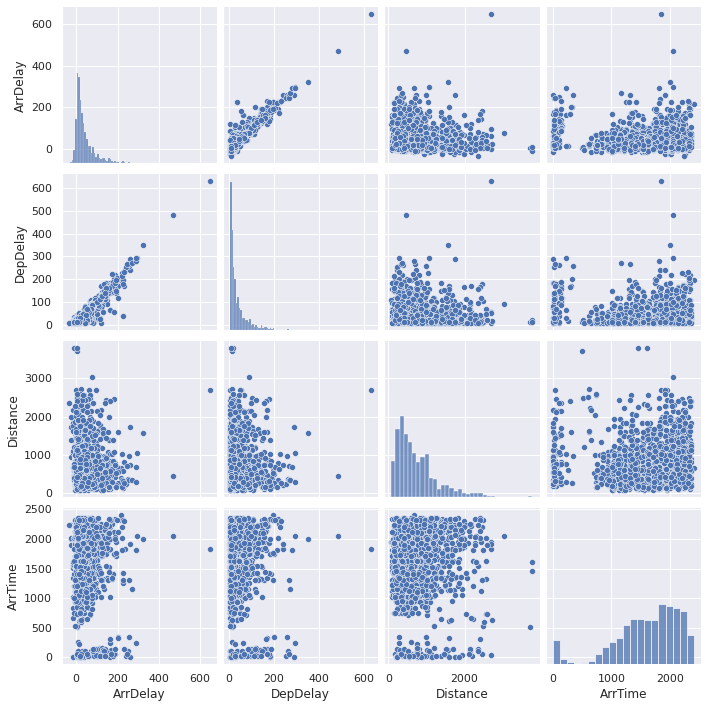

In [24]:
sns.pairplot(X_train[['ArrDelay', 'DepDelay', 'Distance', 'ArrTime']])
plt.savefig("../reports/figures/train_pairplot.png")

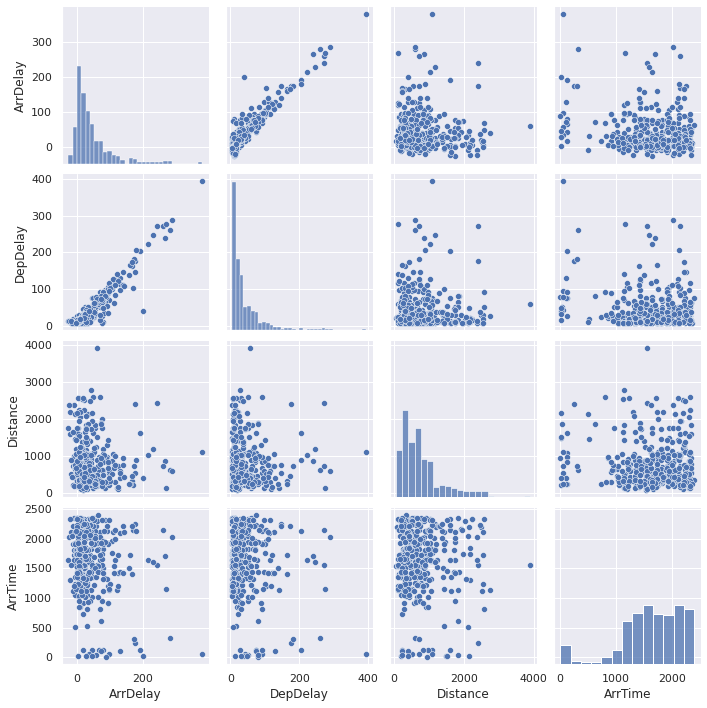

In [25]:
sns.pairplot(X_test[['ArrDelay', 'DepDelay', 'Distance', 'ArrTime']])
plt.savefig("../reports/figures/test_pairplot.png")

In [26]:
X_train.to_csv("../data/interim/X_train.csv", index = False, header = True)
X_test.to_csv("../data/interim/X_test.csv", index = False, header = True)

- Scale Train and Test Data

In [27]:
X_stand = X_train.copy()
X_stand = X_test.copy()

In [28]:
# Import script create for Standar Scaling

import scaling

X_train_stand, X_test_stand = scaling.transform(X_stand, X_test, X_train.columns)

In [29]:
X_train_stand

ArrDelay   ArrTime  Distance    TaxiIn   TaxiOut  DayOfWeek  DepDelay  \
0   -0.815225 -0.872087 -0.470036 -0.475205  0.612314  -0.066014 -0.718033   
1    1.035920 -2.879607 -0.436886  0.812081 -0.015991   1.440653  0.983949   
2    0.258439  0.579813  1.580283  0.972992  0.376700  -0.568236 -0.287647   
3   -0.370950  0.026014 -0.808164 -0.153383 -0.722834   0.436208 -0.346336   
4   -0.593088  1.217410  2.090790  0.007528  0.533776  -1.070458 -0.541966   
..        ...       ...       ...       ...       ...        ...       ...   
383 -0.833737  0.900433 -0.204837  0.972992 -0.644296   0.436208 -0.718033   
384 -0.111790 -0.356544 -0.768385 -0.153383 -0.173067   0.436208 -0.072454   
385 -0.593088  0.368495  0.290753 -0.636115 -0.722834   0.938431 -0.502840   
386  0.702714 -0.380226 -0.504843  0.329349  1.790386  -1.070458  0.084050   
387  0.517599  0.175394 -0.030800 -0.153383  1.868924   1.440653 -0.248521   

     CarrierDelay  UniqueCarrier_9E  UniqueCarrier_AA  UniqueCarrier_AS  \
0       -0.041339         -0.170815         -0.314881         -0.145095   
1        0.000017         -0.170815         -0.314881         -0.145095   
2       -0.583908         -0.170815         -0.314881         -0.145095   
3       -0.583908         -0.170815         -0.314881         -0.145095   
4       -0.041339         -0.170815         -0.314881         -0.145095   
..            ...               ...               ...               ...   
383     -0.041339         -0.170815         -0.314881         -0.145095   
384     -0.583908         -0.170815         -0.314881         -0.145095   
385     -0.041339         -0.170815         -0.314881         -0.145095   
386     -0.583908         -0.170815         -0.314881         -0.145095   
387     -0.583908         -0.170815         -0.314881         -0.145095   

     UniqueCarrier_B6  UniqueCarrier_CO  UniqueCarrier_DL  UniqueCarrier_EV  \
0            -0.18619         -0.262432         -0.256776          4.180453   
1            -0.18619         -0.262432         -0.256776         -0.239209   
2            -0.18619         -0.262432         -0.256776         -0.239209   
3            -0.18619         -0.262432         -0.256776         -0.239209   
4            -0.18619          3.810512         -0.256776         -0.239209   
..                ...               ...               ...               ...   
383          -0.18619         -0.262432         -0.256776         -0.239209   
384          -0.18619         -0.262432         -0.256776         -0.239209   
385          -0.18619         -0.262432         -0.256776         -0.239209   
386          -0.18619         -0.262432         -0.256776         -0.239209   
387          -0.18619         -0.262432         -0.256776         -0.239209   

     UniqueCarrier_F9  UniqueCarrier_FL  UniqueCarrier_HA  UniqueCarrier_MQ  \
0           -0.102062          -0.20739         -0.050833          -0.28948   
1           -0.102062          -0.20739         -0.050833          -0.28948   
2           -0.102062          -0.20739         -0.050833          -0.28948   
3           -0.102062          -0.20739         -0.050833          -0.28948   
4           -0.102062          -0.20739         -0.050833          -0.28948   
..                ...               ...               ...               ...   
383         -0.102062          -0.20739         -0.050833          -0.28948   
384         -0.102062          -0.20739         -0.050833          -0.28948   
385         -0.102062          -0.20739         -0.050833          -0.28948   
386         -0.102062          -0.20739         -0.050833          -0.28948   
387         -0.102062          -0.20739         -0.050833          -0.28948   

     UniqueCarrier_NW  UniqueCarrier_OH  UniqueCarrier_OO  UniqueCarrier_UA  \
0           -0.154100         -0.145095         -0.239209         -0.262432   
1            6.489307         -0.145095         -0.239209         -0.262432   
2           -0.154100         -0

In [30]:
X_test_stand

ArrDelay   ArrTime  Distance    TaxiIn   TaxiOut  DayOfWeek  DepDelay  \
0   -0.815225 -0.872087 -0.470036 -0.475205  0.612314  -0.066014 -0.718033   
1    1.035920 -2.879607 -0.436886  0.812081 -0.015991   1.440653  0.983949   
2    0.258439  0.579813  1.580283  0.972992  0.376700  -0.568236 -0.287647   
3   -0.370950  0.026014 -0.808164 -0.153383 -0.722834   0.436208 -0.346336   
4   -0.593088  1.217410  2.090790  0.007528  0.533776  -1.070458 -0.541966   
..        ...       ...       ...       ...       ...        ...       ...   
383 -0.833737  0.900433 -0.204837  0.972992 -0.644296   0.436208 -0.718033   
384 -0.111790 -0.356544 -0.768385 -0.153383 -0.173067   0.436208 -0.072454   
385 -0.593088  0.368495  0.290753 -0.636115 -0.722834   0.938431 -0.502840   
386  0.702714 -0.380226 -0.504843  0.329349  1.790386  -1.070458  0.084050   
387  0.517599  0.175394 -0.030800 -0.153383  1.868924   1.440653 -0.248521   

     CarrierDelay  UniqueCarrier_9E  UniqueCarrier_AA  UniqueCarrier_AS  \
0       -0.041339         -0.170815         -0.314881         -0.145095   
1        0.000017         -0.170815         -0.314881         -0.145095   
2       -0.583908         -0.170815         -0.314881         -0.145095   
3       -0.583908         -0.170815         -0.314881         -0.145095   
4       -0.041339         -0.170815         -0.314881         -0.145095   
..            ...               ...               ...               ...   
383     -0.041339         -0.170815         -0.314881         -0.145095   
384     -0.583908         -0.170815         -0.314881         -0.145095   
385     -0.041339         -0.170815         -0.314881         -0.145095   
386     -0.583908         -0.170815         -0.314881         -0.145095   
387     -0.583908         -0.170815         -0.314881         -0.145095   

     UniqueCarrier_B6  UniqueCarrier_CO  UniqueCarrier_DL  UniqueCarrier_EV  \
0            -0.18619         -0.262432         -0.256776          4.180453   
1            -0.18619         -0.262432         -0.256776         -0.239209   
2            -0.18619         -0.262432         -0.256776         -0.239209   
3            -0.18619         -0.262432         -0.256776         -0.239209   
4            -0.18619          3.810512         -0.256776         -0.239209   
..                ...               ...               ...               ...   
383          -0.18619         -0.262432         -0.256776         -0.239209   
384          -0.18619         -0.262432         -0.256776         -0.239209   
385          -0.18619         -0.262432         -0.256776         -0.239209   
386          -0.18619         -0.262432         -0.256776         -0.239209   
387          -0.18619         -0.262432         -0.256776         -0.239209   

     UniqueCarrier_F9  UniqueCarrier_FL  UniqueCarrier_HA  UniqueCarrier_MQ  \
0           -0.102062          -0.20739         -0.050833          -0.28948   
1           -0.102062          -0.20739         -0.050833          -0.28948   
2           -0.102062          -0.20739         -0.050833          -0.28948   
3           -0.102062          -0.20739         -0.050833          -0.28948   
4           -0.102062          -0.20739         -0.050833          -0.28948   
..                ...               ...               ...               ...   
383         -0.102062          -0.20739         -0.050833          -0.28948   
384         -0.102062          -0.20739         -0.050833          -0.28948   
385         -0.102062          -0.20739         -0.050833          -0.28948   
386         -0.102062          -0.20739         -0.050833          -0.28948   
387         -0.102062          -0.20739         -0.050833          -0.28948   

     UniqueCarrier_NW  UniqueCarrier_OH  UniqueCarrier_OO  UniqueCarrier_UA  \
0           -0.154100         -0.145095         -0.239209         -0.262432   
1            6.489307         -0.145095         -0.239209         -0.262432   
2           -0.154100         -0

In [31]:
X_train_stand.describe().round(3)

ArrDelay  ArrTime  Distance   TaxiIn  TaxiOut  DayOfWeek  DepDelay  \
count   388.000  388.000   388.000  388.000  388.000    388.000   388.000   
mean     -0.000    0.000    -0.000    0.000    0.000     -0.000     0.000   
std       1.001    1.001     1.001    1.001    1.001      1.001     1.001   
min      -1.260   -2.973    -1.193   -0.797   -1.116     -1.573    -0.718   
25%      -0.630   -0.530    -0.729   -0.475   -0.644     -1.070    -0.601   
50%      -0.325    0.155    -0.274   -0.153   -0.252     -0.066    -0.346   
75%       0.258    0.769     0.336    0.168    0.298      0.938     0.182   
max       6.238    1.398     5.159   14.650   10.587      1.441     6.872   

       CarrierDelay  UniqueCarrier_9E  UniqueCarrier_AA  UniqueCarrier_AS  \
count       388.000           388.000           388.000           388.000   
mean         -0.000            -0.000            -0.000            -0.000   
std           1.001             1.001             1.001             1.001   
min          -0.584            -0.171            -0.315            -0.145   
25%          -0.584            -0.171            -0.315            -0.145   
50%          -0.041            -0.171            -0.315            -0.145   
75%          -0.041            -0.171            -0.315            -0.145   
max           8.694             5.854             3.176             6.892   

       UniqueCarrier_B6  UniqueCarrier_CO  UniqueCarrier_DL  UniqueCarrier_EV  \
count           388.000           388.000           388.000           388.000   
mean             -0.000             0.000             0.000            -0.000   
std               1.001             1.001             1.001             1.001   
min              -0.186            -0.262            -0.257            -0.239   
25%              -0.186            -0.262            -0.257            -0.239   
50%              -0.186            -0.262            -0.257            -0.239   
75%              -0.186            -0.262            -0.257            -0.239   
max               5.371             3.811             3.894             4.180   

       UniqueCarrier_F9  UniqueCarrier_FL  UniqueCarrier_HA  UniqueCarrier_MQ  \
count           388.000           388.000           388.000           388.000   
mean              0.000            -0.000            -0.000            -0.000   
std               1.001             1.001             1.001             1.001   
min              -0.102            -0.207            -0.051            -0.289   
25%              -0.102            -0.207            -0.051            -0.289   
50%              -0.102            -0.207            -0.051            -0.289   
75%              -0.102            -0.207            -0.051            -0.289   
max               9.798             4.822            19.672             3.454   

       UniqueCarrier_NW  UniqueCarrier_OH  UniqueCarrier_OO  UniqueCarrier_UA  \
count           388.000           388.000           388.000           388.000   
mean             -0.000            -0.000            -0.000             0.000   
std               1.001             1.001             1.001             1.001   
min              -0.154            -0.145            -0.239            -0.262   
25%              -0.154            -0.145            -0.239            -0.262   
50%              -0.154            -0.145            -0.239            -0.262   
75%              -0.154            -0.145            -0.239            -0.262   
max               6.489             6.892             4.180             3.811   

       UniqueCarrier_US  UniqueCarrier_WN  UniqueCarrier_XE  UniqueCarrier_YV  
count           388.000           388.000           388.000           388.000  
mean             -0.000             0.000             0.000            -0.000  
std               1.001             1.001             1.001             1.001  
min              -0.239            -0.534            -0.227            -0.171  
25%              -0.239      

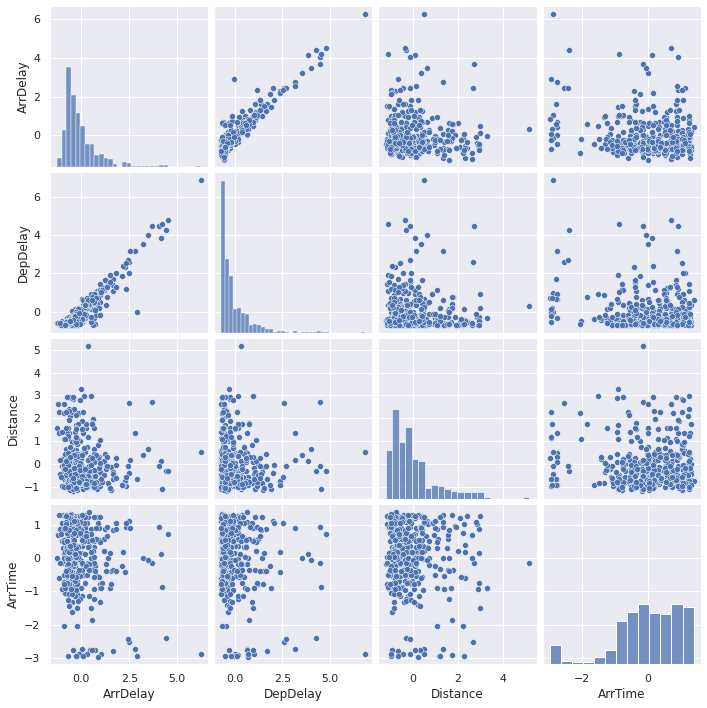

In [32]:
sns.pairplot(X_train_stand[['ArrDelay', 'DepDelay', 'Distance', 'ArrTime']])
plt.savefig("../reports/figures/X_train_stand_pairplot.png")

In [33]:
X_test_stand.describe().round(3)

ArrDelay  ArrTime  Distance   TaxiIn  TaxiOut  DayOfWeek  DepDelay  \
count   388.000  388.000   388.000  388.000  388.000    388.000   388.000   
mean     -0.000    0.000    -0.000    0.000    0.000     -0.000     0.000   
std       1.001    1.001     1.001    1.001    1.001      1.001     1.001   
min      -1.260   -2.973    -1.193   -0.797   -1.116     -1.573    -0.718   
25%      -0.630   -0.530    -0.729   -0.475   -0.644     -1.070    -0.601   
50%      -0.325    0.155    -0.274   -0.153   -0.252     -0.066    -0.346   
75%       0.258    0.769     0.336    0.168    0.298      0.938     0.182   
max       6.238    1.398     5.159   14.650   10.587      1.441     6.872   

       CarrierDelay  UniqueCarrier_9E  UniqueCarrier_AA  UniqueCarrier_AS  \
count       388.000           388.000           388.000           388.000   
mean         -0.000            -0.000            -0.000            -0.000   
std           1.001             1.001             1.001             1.001   
min          -0.584            -0.171            -0.315            -0.145   
25%          -0.584            -0.171            -0.315            -0.145   
50%          -0.041            -0.171            -0.315            -0.145   
75%          -0.041            -0.171            -0.315            -0.145   
max           8.694             5.854             3.176             6.892   

       UniqueCarrier_B6  UniqueCarrier_CO  UniqueCarrier_DL  UniqueCarrier_EV  \
count           388.000           388.000           388.000           388.000   
mean             -0.000             0.000             0.000            -0.000   
std               1.001             1.001             1.001             1.001   
min              -0.186            -0.262            -0.257            -0.239   
25%              -0.186            -0.262            -0.257            -0.239   
50%              -0.186            -0.262            -0.257            -0.239   
75%              -0.186            -0.262            -0.257            -0.239   
max               5.371             3.811             3.894             4.180   

       UniqueCarrier_F9  UniqueCarrier_FL  UniqueCarrier_HA  UniqueCarrier_MQ  \
count           388.000           388.000           388.000           388.000   
mean              0.000            -0.000            -0.000            -0.000   
std               1.001             1.001             1.001             1.001   
min              -0.102            -0.207            -0.051            -0.289   
25%              -0.102            -0.207            -0.051            -0.289   
50%              -0.102            -0.207            -0.051            -0.289   
75%              -0.102            -0.207            -0.051            -0.289   
max               9.798             4.822            19.672             3.454   

       UniqueCarrier_NW  UniqueCarrier_OH  UniqueCarrier_OO  UniqueCarrier_UA  \
count           388.000           388.000           388.000           388.000   
mean             -0.000            -0.000            -0.000             0.000   
std               1.001             1.001             1.001             1.001   
min              -0.154            -0.145            -0.239            -0.262   
25%              -0.154            -0.145            -0.239            -0.262   
50%              -0.154            -0.145            -0.239            -0.262   
75%              -0.154            -0.145            -0.239            -0.262   
max               6.489             6.892             4.180             3.811   

       UniqueCarrier_US  UniqueCarrier_WN  UniqueCarrier_XE  UniqueCarrier_YV  
count           388.000           388.000           388.000           388.000  
mean             -0.000             0.000             0.000            -0.000  
std               1.001             1.001             1.001             1.001  
min              -0.239            -0.534            -0.227            -0.171  
25%              -0.239      

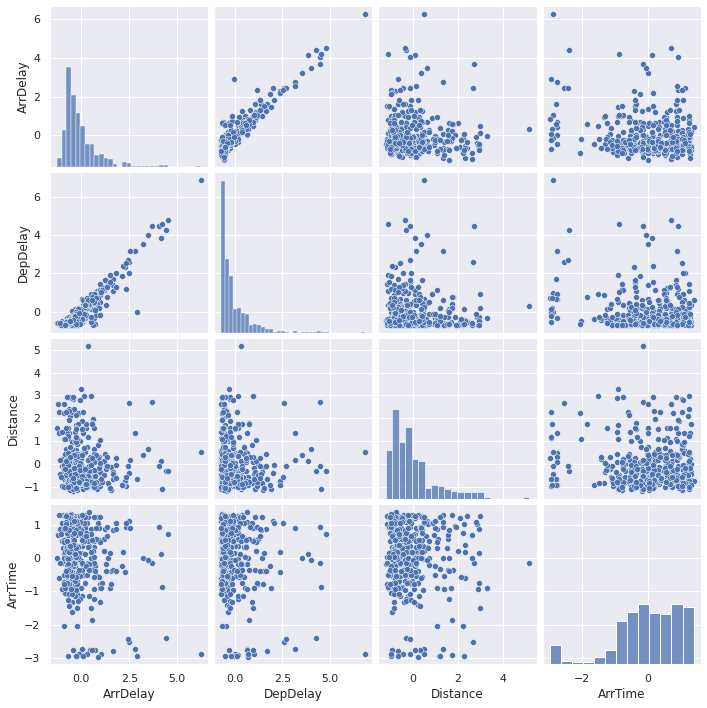

In [34]:
sns.pairplot(X_test_stand[['ArrDelay', 'DepDelay', 'Distance', 'ArrTime']])
plt.savefig("../reports/figures/X_test_stand_pairplot.png")

In [35]:
X_train_stand.to_csv("../data/interim/X_train_stand.csv", index = False, header = True)
X_test_stand.to_csv("../data/interim/X_test_stand.csv", index = False, header = True)